In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [160]:
titanic=pd.read_csv("train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Analyze the data

In [161]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


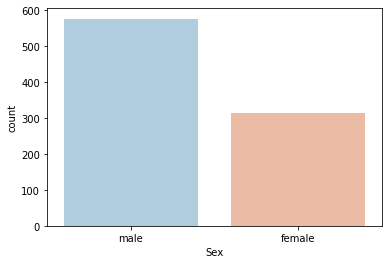

In [17]:
sns.countplot(x="Sex", data=titanic, palette="RdBu_r")

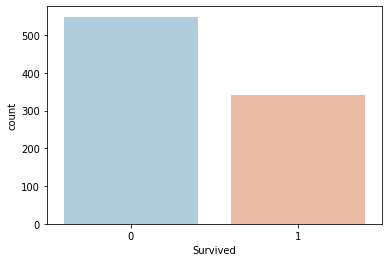

In [18]:
sns.countplot(x="Survived", data=titanic, palette="RdBu_r")

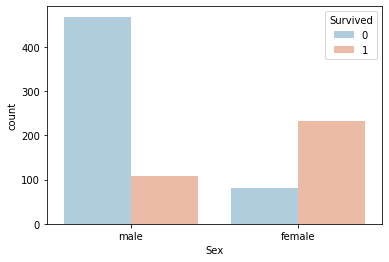

In [20]:
sns.countplot(x="Sex",hue="Survived", data=titanic,palette="RdBu_r" )

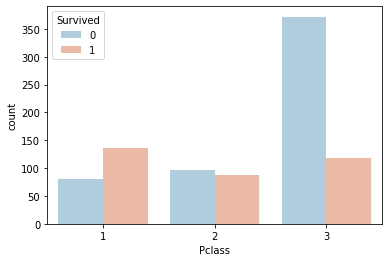

In [22]:
sns.countplot(x="Pclass", hue="Survived",data=titanic, palette="RdBu_r")

In [24]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


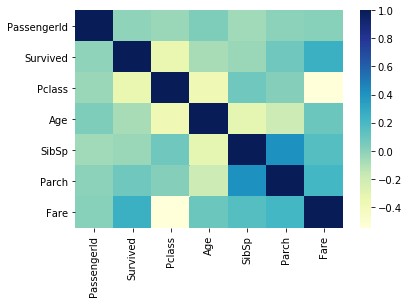

In [28]:
sns.heatmap(titanic.corr(), cmap="YlGnBu")

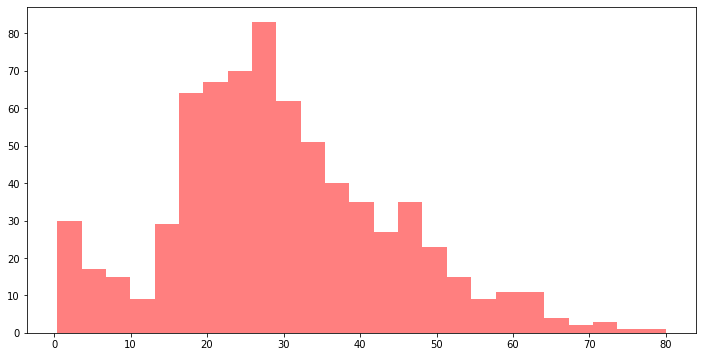

In [38]:
plt.figure(figsize=(12,6))
plt.hist(x="Age", data=titanic, bins=25, color="r", alpha=0.5);

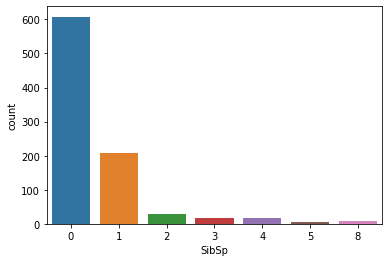

In [39]:
sns.countplot(x="SibSp", data=titanic)

## Data cleaning

**Since Age has roughly 20% of missing values, we will replace the missing values. Let's look at how to replace the missing values of the age.**

In [42]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


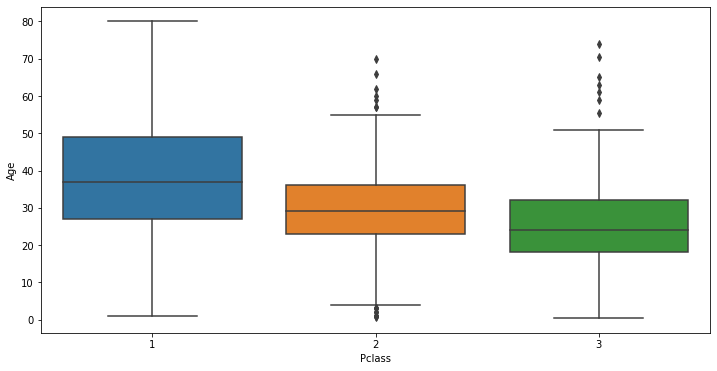

In [44]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Pclass", y="Age", data=titanic)

In [162]:
titanic.groupby(by="Pclass").mean("Age")

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


**Looking at the data above, let's replace the age based on the average of the pclass.**

In [163]:
def age_replacement(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 38
        elif Pclass==2:
            return 30
        else:
            return 25
    
    else:
        return Age
    
        

In [164]:
titanic["Age"]=titanic[["Age", "Pclass"]].apply(age_replacement, axis=1)

In [165]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Let's get rid of the cabin column, since there are too many null values.**

In [166]:
titanic.drop(["Cabin"], axis=1,inplace=True)

In [167]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [168]:
titanic.dropna(inplace=True)

## Let's get convert categorical features into dummy features using pandas.

In [169]:
sex=pd.get_dummies(titanic["Sex"], drop_first=True)
embarked=pd.get_dummies(titanic["Embarked"], drop_first=True)

In [170]:
titanic.drop(["Sex", "Name", "Ticket", "Embarked"], axis=1, inplace=True)

In [171]:
titanic=pd.concat([titanic, sex, embarked], axis=1)

In [172]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


## Using Logistic Regression

In [177]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression

In [202]:
X=titanic.drop(["Survived"],axis=1)
y=titanic["Survived"]

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3)
model=LogisticRegression(max_iter=1000)
model.fit(X, y)
predictions=model.predict(X)

print(classification_report(y, predictions))
#plot_confusion_matrix( predictions,X, y, normalize=True)
print(confusion_matrix(y, predictions, normalize="true"))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       549
           1       0.77      0.71      0.74       340

    accuracy                           0.81       889
   macro avg       0.80      0.79      0.79       889
weighted avg       0.80      0.81      0.80       889

[[0.86703097 0.13296903]
 [0.29411765 0.70588235]]


# Using NNs

In [203]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [213]:
X_train.shape
tf.keras.backend.set_floatx('float64')

In [214]:
model=Sequential()

model.add(Dense(units=20, activation="sigmoid"))
model.add(Dense(units=15,activation='sigmoid'))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss="binary_crossentropy", optimizer="adam")

In [215]:
model.fit(X_train, 
          y=y_train,
          epochs=60,
          validation_data=(X_test, y_test),
          verbose=1

)

Epoch 1/60
20/20 [==============================] - 0s 6ms/step - loss: 0.6727 - val_loss: 0.6533
Epoch 2/60
20/20 [==============================] - 0s 2ms/step - loss: 0.6706 - val_loss: 0.6502
Epoch 3/60
20/20 [==============================] - 0s 2ms/step - loss: 0.6709 - val_loss: 0.6465
Epoch 4/60
20/20 [==============================] - 0s 2ms/step - loss: 0.6670 - val_loss: 0.6456
Epoch 5/60
20/20 [==============================] - 0s 2ms/step - loss: 0.6649 - val_loss: 0.6418
Epoch 6/60
20/20 [==============================] - 0s 2ms/step - loss: 0.6624 - val_loss: 0.6416
Epoch 7/60
20/20 [==============================] - 0s 2ms/step - loss: 0.6604 - val_loss: 0.6414
Epoch 8/60
20/20 [==============================] - 0s 2ms/step - loss: 0.6598 - val_loss: 0.6381
Epoch 9/60
20/20 [==============================] - 0s 2ms/step - loss: 0.6569 - val_loss: 0.6373
Epoch 10/60
20/20 [==============================] - 0s 2ms/step - loss: 0.6547 - val_loss: 0.6309
Epoch 11/60
20/20 [

In [216]:
model_loss = pd.DataFrame(model.history.history)

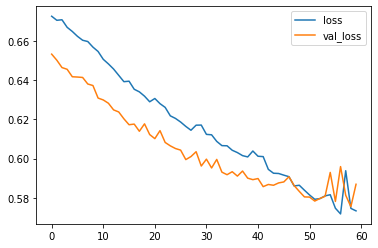

In [217]:
model_loss.plot()

In [218]:
predictions = model.predict_classes(X_test)

In [220]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions, normalize="true"))

              precision    recall  f1-score   support

           0       0.76      0.75      0.75       175
           1       0.53      0.54      0.54        92

    accuracy                           0.68       267
   macro avg       0.64      0.65      0.65       267
weighted avg       0.68      0.68      0.68       267

[[0.74857143 0.25142857]
 [0.45652174 0.54347826]]


## SVM

In [229]:
from sklearn.svm import SVC


In [223]:

model=SVC()
model.fit(X_train, y_train)
svm_predictions = model.predict(X_test)
print(classification_report(y_test, svm_predictions))
print(confusion_matrix(y_test, svm_predictions, normalize="true"))

              precision    recall  f1-score   support

           0       0.70      0.97      0.81       175
           1       0.76      0.21      0.32        92

    accuracy                           0.70       267
   macro avg       0.73      0.59      0.57       267
weighted avg       0.72      0.70      0.64       267

[[0.96571429 0.03428571]
 [0.79347826 0.20652174]]


## Catboost

In [231]:
from catboost import CatBoostClassifier

In [233]:
model=CatBoostClassifier(verbose=False )
model.fit(X_train, y_train)
cat_predictions=model.predict(X_test)

print(classification_report(y_test, cat_predictions))
print(confusion_matrix(y_test, cat_predictions, normalize="true"))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       175
           1       0.84      0.72      0.77        92

    accuracy                           0.85       267
   macro avg       0.85      0.82      0.83       267
weighted avg       0.85      0.85      0.85       267

[[0.92571429 0.07428571]
 [0.2826087  0.7173913 ]]
